**CP2 - Inteligência Artificial e Computacional**

Classificadores

---

#### **Integrantes:**

Vinicius Alves Torres - RM 94266

Felipe Breno Sugisawa Altran - RM 94170

*Orientações:*

*   Esse arquivo contem o modelo esperado de respostas para a CP2. Podem ser acrescentadas algumas outras informações ou trechos com códigos, entretanto não esqueçam de responder todos os pontos que foram levantados a seguir
*   **CP2 em duplas**
*   Usar o arquivo 40922.csv para receber os seus dados e realizar esse CP
*   Prazo de entrega: 26/09 via TEAMS
*   Entregar esse arquivo com a sua resolução via TEAMS

## Exercícico de Classificação de Dados

In [ ]:
# Tratamento dos dados
import numpy as np
import pandas as pd
from collections import Counter

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
# IMPORTAR SEUS MODELOS DE MACHILE LEARNING E OUTRAS BIBS NECESSÁRIAS
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#######################################################################

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

# importando os datasets padroes do sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

1. Carregar os dataset do exercício:

In [ ]:
# Carregue aqui o conjunto de dados
# dados = pd.read_csv("40922.csv", sep = ',')

# https://drive.google.com/file/d/1U5Eky9I9PSYFJTaoCRs1Gvj1mS3IFKxT/view?usp=sharing
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1U5Eky9I9PSYFJTaoCRs1Gvj1mS3IFKxT'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './40922.csv', 
                                    showsize = True)# (link hash, save here as, view download)

dados = pd.read_csv("40922.csv", sep = ',')


Esse conjunto de dados possui os seguintes atributos:

Dados dos sensores:
*   acceleration_x
*   acceleration_y
*   acceleration_z
*   gyro_x
*   gyro_y
*   gyro_z

Atividade física: 
*   "0": andando e "1": correndo

2. Fazer a análise exploratória dos dados 

Responda aos seguintes itens:

a) Verificação os tipos de dados envolvidos;

b) Verificar as médias, desvios padrões e distribuição dos dados

c) Checar por valores nulos no conjunto de dados (e se existir, tratá-los)

d) Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)

e) Verificar via heatmap com a correlação de Pearson a relação entre os atributos

# **Verificação os tipos de dados envolvidos;**

In [ ]:
# Colunas e Linhas
dados[["acceleration_x","acceleration_y","acceleration_z","gyro_x","gyro_y","gyro_z","activity" ]]

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0
...,...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,20.1240,0.6048,0
88584,0.4977,-10.0270,-0.4397,0.1022,-12.5650,-0.0761,0
88585,0.4587,-11.7800,-0.2827,-14.5000,-0.2792,-12.6160,0
88586,0.2590,-0.8582,-0.0759,-15.1650,0.4560,-17.7550,0


In [ ]:
# Verificação dos tipos de dados envolvidos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acceleration_x  88588 non-null  float64
 1   acceleration_y  88588 non-null  float64
 2   acceleration_z  88588 non-null  float64
 3   gyro_x          88588 non-null  float64
 4   gyro_y          88588 non-null  float64
 5   gyro_z          88588 non-null  float64
 6   activity        88588 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 4.7 MB


In [ ]:
# Visualização dos dados
dados.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0


In [ ]:
dados.shape

(88588, 7)

In [ ]:
# Filtrando dados
dados.activity

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [ ]:
# Selecionando um intervalo de linhas e duas colunas
dados.iloc[0:10, [1,5]]

,acceleration_y,gyro_z
0,-0.7814,-29.2960
1,-11.2330,0.1269
2,-14.8170,-24.3670
3,-0.8125,-29.3360
4,-0.9312,24.9220
5,-0.8056,25.7500
6,-11.2900,0.4473
7,-13.5030,-14.3480
8,-0.8633,-26.7590
9,-10.7400,16.9820


In [ ]:
# Criando uma mascara com valores maiores ou iguais a 50
dados["gyro_z"] >=50

0        False
1        False
2        False
3        False
4        False
         ...  
88583    False
88584    False
88585    False
88586    False
88587    False
Name: gyro_z, Length: 88588, dtype: bool

## **Verificar as médias, desvios padrões e distribuição dos dados**

In [ ]:
#Verificar as médias, desvios padrões - Acceleration_x
media_acceleration_x = dados.acceleration_x.mean()
desvpad_acceleration_x = dados.acceleration_x.std()

print(f"Média: {media_acceleration_x} \nDesvio padrão: {desvpad_acceleration_x}" )


Média: -0.7354027520657421 
Desvio padrão: 9.419857065987241


In [ ]:
#Verificar as médias, desvios padrões - Acceleration_y
media_acceleration_y = dados.acceleration_y.mean()
desvpad_acceleration_y = dados.acceleration_y.std()

print(f"Média: {media_acceleration_y} \nDesvio padrão: {desvpad_acceleration_y}" )

Média: -3.4258644037567167 
Desvio padrão: 5.633841520153328


In [ ]:
#Verificar as médias, desvios padrões - Acceleration_z
media_acceleration_z = dados.acceleration_z.mean()
desvpad_acceleration_z = dados.acceleration_z.std()

print(f"Média: {media_acceleration_z} \nDesvio padrão: {desvpad_acceleration_z}" )


Média: -1.585893754233079 
Desvio padrão: 4.63148583438513


In [ ]:
#Verificar as médias, desvios padrões - gyro_x
media_gyro_x = dados.gyro_x.mean()
desvpad_gyro_x= dados.gyro_x.std()

print(f"Média: {media_gyro_x} \nDesvio padrão: {desvpad_gyro_x}" )


Média: 0.00568961823271777 
Desvio padrão: 11.77959591018314


In [ ]:
#Verificar as médias, desvios padrões - gyro_y
media_gyro_y = dados.gyro_y.mean()
desvpad_gyro_y= dados.gyro_y.std()

print(f"Média: {media_gyro_y} \nDesvio padrão: {desvpad_gyro_y}" )


Média: 0.28564502754323384 
Desvio padrão: 11.209551863783979


In [ ]:
#Verificar as médias, desvios padrões - gyro_z
media_gyro_z = dados.gyro_z.mean()
desvpad_gyro_z= dados.gyro_z.std()

print(f"Média: {media_gyro_z} \nDesvio padrão: {desvpad_gyro_z}" )

Média: 0.28125354336930514 
Desvio padrão: 18.821379328440432


In [ ]:
#Verificar as médias, desvios padrões - activity
media_activity = dados.activity.mean()
desvpad_activity= dados.activity.std()

print(f"Média: {media_activity} \nDesvio padrão: {desvpad_activity}" )

Média: 0.5008014629520928 
Desvio padrão: 0.5000021797296387


**Relação de dados em cada coluna a fim de identificar padrões e realizar previsões.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f497eab5dd0>,
      dtype=object)

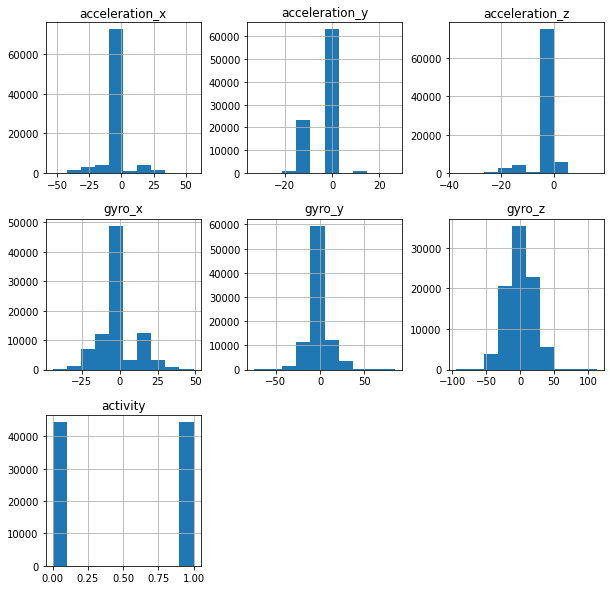

In [ ]:
# Distribuição dos dados
# Plotando histogramas
dados.hist(figsize=(10,10))

Todos os graficos exceto o "activity" possuem a maior quantia proxima a 0
No "gyro_z" ha uma quantidade aproximada de 87.500 respostas sendo delas ≅34.000 respostas proximas a 0 possuindo ≅39% das respostas

# **Checar por valores nulos no conjunto de dados (e se existir, tratá-los)**

In [ ]:
#Checar por valores nulos no conjunto de dados (e se existir, tratá-los)
# Valores nulos
dados.isnull()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
88583,False,False,False,False,False,False,False
88584,False,False,False,False,False,False,False
88585,False,False,False,False,False,False,False
88586,False,False,False,False,False,False,False


In [ ]:
# Contando a quantidade de valores verdadeiros ou falsos das colunas
dados.isnull().sum()

acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
activity          0
dtype: int64

In [ ]:
# Tratando/Conferindo os valores nulos
dados_drop = dados.dropna()
print ("Dados: ",dados.shape, "|", "Dados sem valores nulos: ",dados_drop.shape)

Dados:  (88588, 7) | Dados sem valores nulos:  (88588, 7)


In [ ]:
# Aplicando o One Hot Enconding
dados_1 = pd.get_dummies(dados["acceleration_y"], prefix = "acceleration_y")
dados_1.head()

,acceleration_y_-32.99,acceleration_y_-26.563,acceleration_y_-25.874,acceleration_y_-25.771,acceleration_y_-25.403,acceleration_y_-24.415,acceleration_y_-23.662,acceleration_y_-23.646,acceleration_y_-23.603,acceleration_y_-23.597,...,acceleration_y_22.291,acceleration_y_22.306,acceleration_y_22.389,acceleration_y_22.626,acceleration_y_24.066,acceleration_y_24.185,acceleration_y_25.023,acceleration_y_25.646,acceleration_y_26.077,acceleration_y_26.68
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)**

In [ ]:
# Explorar dados categoricos
colunas_categoricas =dados[["acceleration_x","acceleration_y","acceleration_z","gyro_x","gyro_y","gyro_z","activity" ]]
for col_name in colunas_categoricas:  
    print('-------------------------------')
    print(dados.groupby([col_name]).size())

-------------------------------
acceleration_x
-53.505    1
-51.739    1
-51.010    1
-49.609    1
-49.171    1
          ..
 43.849    1
 44.313    1
 48.701    1
 49.068    1
 56.033    1
Length: 30307, dtype: int64
-------------------------------
acceleration_y
-32.990    1
-26.563    1
-25.874    1
-25.771    1
-25.403    1
          ..
 24.185    1
 25.023    1
 25.646    1
 26.077    1
 26.680    1
Length: 23957, dtype: int64
-------------------------------
acceleration_z
-37.538    1
-33.174    1
-32.869    1
-32.317    1
-31.943    1
          ..
 13.488    1
 13.552    1
 14.793    1
 15.579    1
 16.403    1
Length: 19698, dtype: int64
-------------------------------
gyro_x
-44.306    1
-44.276    1
-42.995    1
-42.821    1
-42.582    1
          ..
 46.581    1
 46.912    1
 47.143    1
 47.617    1
 48.742    1
Length: 40988, dtype: int64
-------------------------------
gyro_y
-74.647    1
-69.557    1
-66.959    1
-66.781    1
-66.332    1
          ..
 69.332    1
 70.32

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


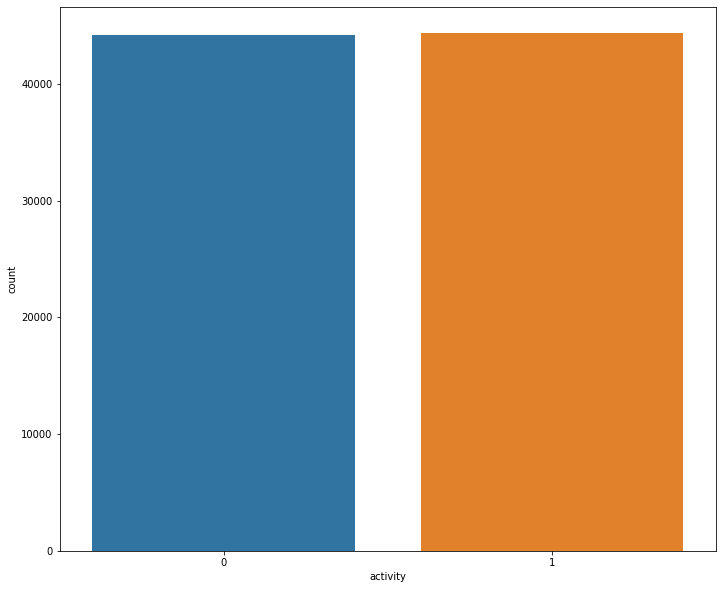

In [ ]:
#Colunas Categoricas - plotanto gráficos (TODOS OS DADOS)
colunas_categoricas = ["activity"]
plt.figure(figsize=(40,40))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in colunas_categoricas:
    plt.subplot(3,3,i)
    sns.countplot(dados[col_name])
    i += 1

Ao analisar a tabela do dado categorico "activity" observa-se a divisão em 2 grupos com respostas 0:andando e 1:correndo, demonstrando que há ≅Q2(50%) um para cada tipo, valores naturalmente divididos podem possuir uma alta capacidade de encontrar um padrao proporcional e realizar analizes precisas

In [ ]:
#explorar dados categoricos
#activity
dados.groupby(['activity']).size()

activity
0    44223
1    44365
dtype: int64

In [ ]:
dados['activity'].replace({ 1:'acceleration_x',2:'acceleration_y',3:'acceleration_z'}, inplace = True)

In [ ]:
dados.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0


In [ ]:
dados.describe()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,-0.735403,-3.425864,-1.585894,0.005690,0.285645,0.281254
std,9.419857,5.633842,4.631486,11.779596,11.209552,18.821379
min,-53.505000,-32.990000,-37.538000,-44.306000,-74.647000,-94.800000
25%,-0.381800,-10.335000,-0.376000,-0.920700,-0.644825,-13.451250
50%,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,0.355500,-0.241775,-0.085900,0.888800,0.733700,13.982000
max,56.033000,26.680000,16.403000,48.742000,84.980000,112.662000


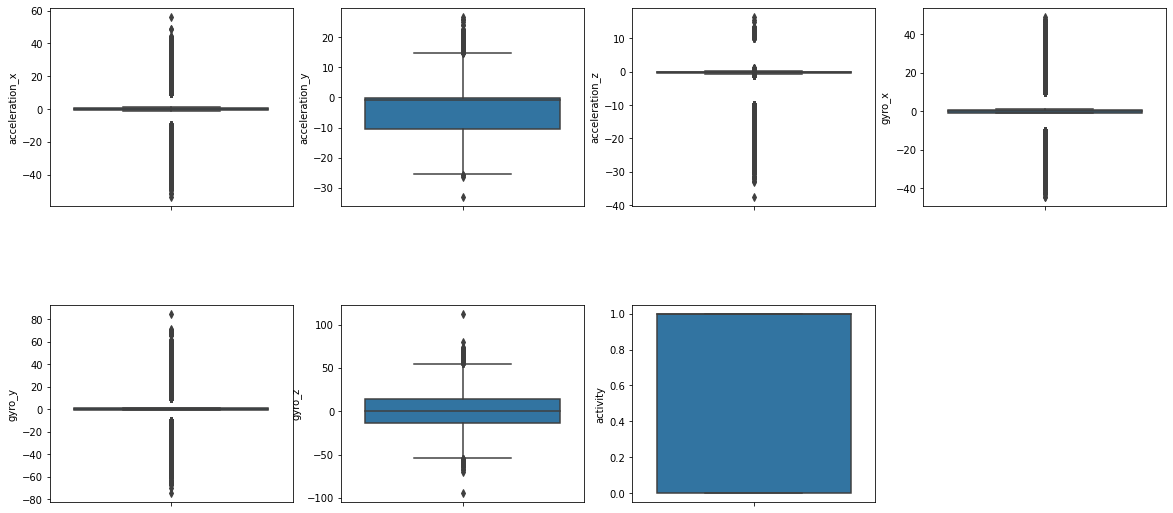

In [ ]:
# Outliers com Boxplots 
colunas_categoricas = ["acceleration_x","acceleration_y","acceleration_z","gyro_x","gyro_y","gyro_z","activity"] 
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
 

i = 1
for col_name in colunas_categoricas:
    plt.subplot(4,4,i)
    sns.boxplot(data=dados,y=col_name)
    i +=1

**Outlier**: Com base nos valores discrepantes em relação a media, nos outliers(fora da linha/media) é notoria um valor atípico em relacao aos demais.
Ele interfere no cálculo das estatísticas, por isso, em muitas situações deve ser removido. Em outros casos ele pode ser mantido para ser estudado separadamente.

Percebe-se que em dados como: acceleration_y e gyro_z possuem dados com pontos fora curva.

**acceleration_y**: Foram selecionados buscando o ponto central 0 com uma margem ate +25 e -15, com irregualirades representando 52.5% ≅Q2 da tabela

**gyro_z**: Foram selecionados buscando o ponto central 0 com uma margem ate +50 e -50, com irregualirades representando 39% ≅Q1.56 da tabela

In [ ]:
mediana_ACC = dados["acceleration_y"].median()
"Mediana acceleration_y:  ", mediana_ACC

('Mediana acceleration_y:  ', -0.7591)

In [ ]:
mediana_gyro = dados["gyro_z"].median()
"Mediana de gyro_z:  ", mediana_gyro

('Mediana de gyro_z:  ', 0.0069)

In [ ]:
mask_Acc = (dados["acceleration_y"] < 15) | (dados["acceleration_y"] > -25)
mask_Acc

0        True
1        True
2        True
3        True
4        True
         ... 
88583    True
88584    True
88585    True
88586    True
88587    True
Name: acceleration_y, Length: 88588, dtype: bool

In [ ]:
mask_Acc = (dados["gyro_z"] < 50) | (dados["gyro_z"] > -50)
mask_Acc

0        True
1        True
2        True
3        True
4        True
         ... 
88583    True
88584    True
88585    True
88586    True
88587    True
Name: gyro_z, Length: 88588, dtype: bool

In [ ]:
dados[mask_Acc].shape

(88588, 7)

In [ ]:
temp = [-0.7591, 0.0069]

In [ ]:
Q1 = np.percentile(temp, 25)
Q3 = np.percentile(temp, 75)

print('Q1: %.2f' %Q1)
print('Q3: %.2f' %Q3)

Q1: -0.57
Q3: -0.18


In [ ]:
C   = 1.5
IIQ = Q3 - Q1
LI  = Q1 - C*IIQ
LS  = Q3 + C*IIQ

print('IIQ: %.2f' %IIQ)
print('Limites:')
print(' Inferior: %.2f' %LI)
print(' Superior: %.2f' %LS)

IIQ: 0.38
Limites:
 Inferior: -1.14
 Superior: 0.39


In [ ]:
outliers = ['acceleration_y', 'gyro_z']

In [ ]:
temp_sem_outliers_IIQ = []
outliers              = []
for t in temp:
    if t > LS or t < LI:
        outliers.append(t)
    else:
        temp_sem_outliers_IIQ.append(t)

print('Outliers: ')
print(outliers)
print('Sem Outliers: ')
print(temp_sem_outliers_IIQ)


Outliers: 
[]
Sem Outliers: 
[-0.7591, 0.0069]


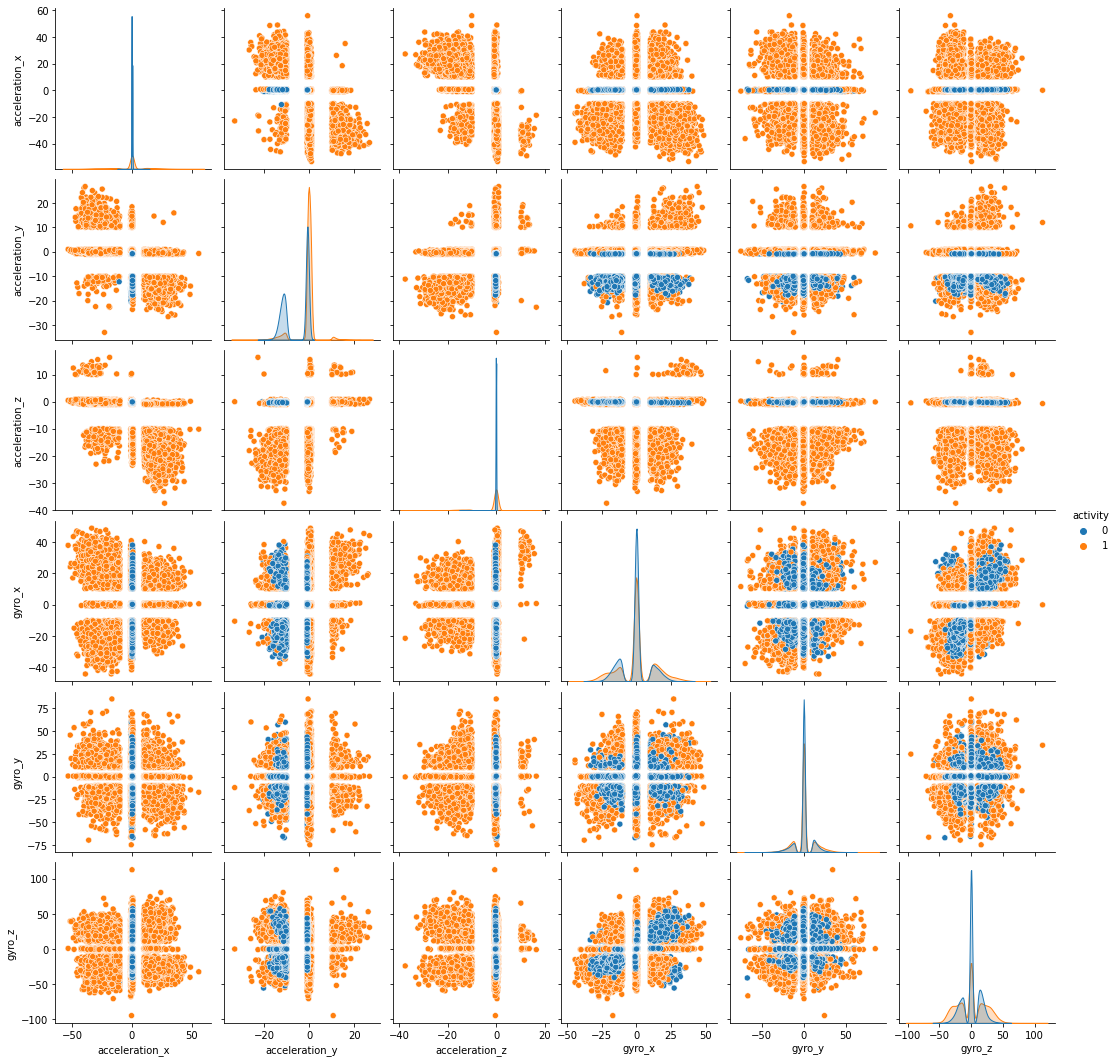

In [ ]:
# Pontos de outliers nos diferentes atributos
sns.pairplot(dados, hue= 'activity')

### Pairplots
Plotamos várias distribuições bivariadas de pares em um conjunto de dados. Isso mostra a relação para (n, 2) combinação de variável em um DataFrame como uma matriz de gráficos e os gráficos diagonais são os gráficos univariados podendo vizualizar os dados que na maioria dos casos estarao em grupos seguindo um padrao/media caso nao haja uma quantidade excessiva de outlierns

In [ ]:
# Tratando dados - removendo
dados.drop(columns=["acceleration_y","acceleration_z"])

,acceleration_x,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.0590,0.0325,-29.2960,0
1,0.6722,-0.1757,0.0208,0.1269,0
2,0.4399,-0.9105,0.1063,-24.3670,0
3,0.3031,0.1199,-0.4099,-29.3360,0
4,0.4814,0.0527,0.4379,24.9220,0
...,...,...,...,...,...
88583,0.3084,0.4823,20.1240,0.6048,0
88584,0.4977,0.1022,-12.5650,-0.0761,0
88585,0.4587,-14.5000,-0.2792,-12.6160,0
88586,0.2590,-15.1650,0.4560,-17.7550,0


In [ ]:
dados.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0


In [ ]:
dados['acceleration_x'] = dados['gyro_x'].replace({'acceleration_y' : 'gyro_y'})

In [ ]:
dados.groupby('acceleration_x').mean()

,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
acceleration_x,,,,,
-44.306,0.1993,0.2360,-44.306,18.0670,-47.6030
-44.276,0.5037,0.2280,-44.276,15.3280,-15.0760
-42.995,-0.8324,0.4334,-42.995,-19.4060,-34.5160
-42.821,-0.4649,0.3737,-42.821,-24.5000,-20.8850
-42.582,-0.8847,0.5733,-42.582,-29.3230,-40.6120
...,...,...,...,...,...
46.581,0.9515,0.9794,46.581,23.6370,0.9809
46.912,0.7497,10.0660,46.912,0.6387,21.0530
47.143,-0.3384,0.4266,47.143,-0.1152,21.4250


In [ ]:
dados.groupby('acceleration_x').std()

,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
acceleration_x,,,,,
-44.306,NaN,NaN,NaN,NaN,NaN
-44.276,NaN,NaN,NaN,NaN,NaN
-42.995,NaN,NaN,NaN,NaN,NaN
-42.821,NaN,NaN,NaN,NaN,NaN
-42.582,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
46.581,NaN,NaN,NaN,NaN,NaN
46.912,NaN,NaN,NaN,NaN,NaN
47.143,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Fazer uma comparação
dados["activity"].replace({"activity" : "Normal"},inplace = False)

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: object

# **Verificar via heatmap com a correlação de Pearson a relação entre os atributos**

In [ ]:
correlation = dados.corr()

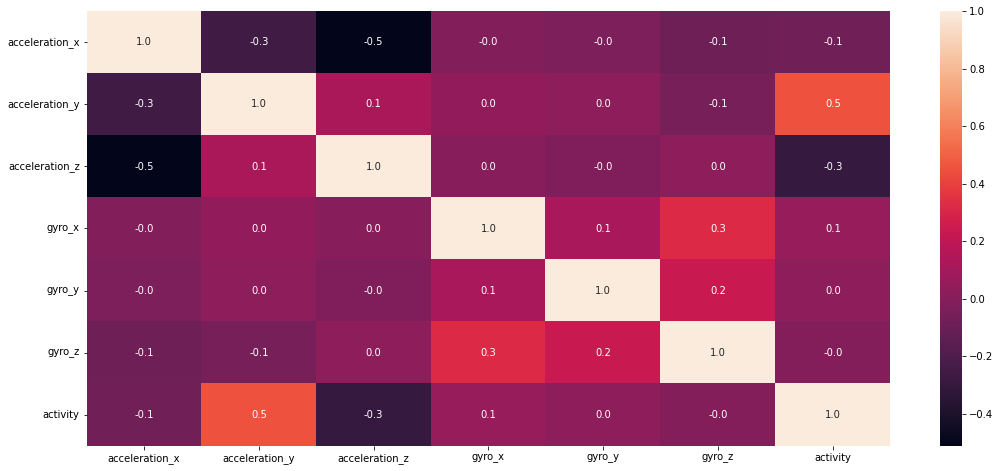

In [ ]:
# Verificar via heatmap com a correlação de Pearson a relação entre os atributos
sns.heatmap(dados.corr(method = "pearson"), annot = True, fmt=".1f")

### Heatmap
**Heatmap com a correlação de Pearson**:Esta representação utiliza o espectro de cores, das “quentes” (vermelhas) para as “frias” (azuis) para identificar as áreas de maior ou menor temperatura, de forma literal, ou de atividade. Esses mapas ajudam a compreender melhor a distribuição da informação de acordo com os pontos que o usuário mais interage

É notoria por meio de cores a presenca de valores fora da curva aproximada de 1.0 tendo valores com cores azuis de -0.5(outlier negativo) e laranja de 0.5(outlier positivo)

In [ ]:
dados.describe()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,-0.735403,-3.425864,-1.585894,0.005690,0.285645,0.281254,0.500801
std,9.419857,5.633842,4.631486,11.779596,11.209552,18.821379,0.500002
min,-53.505000,-32.990000,-37.538000,-44.306000,-74.647000,-94.800000,0.000000
25%,-0.381800,-10.335000,-0.376000,-0.920700,-0.644825,-13.451250,0.000000
50%,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900,1.000000
75%,0.355500,-0.241775,-0.085900,0.888800,0.733700,13.982000,1.000000
max,56.033000,26.680000,16.403000,48.742000,84.980000,112.662000,1.000000


3a. Dividir os dados em conjunto de treinamento (75%) e teste (25%). Escalar os dados se necessário e JUSTIFICAR porque os dados foram escalados ou não.

Os dados foram escalados para poder aplicar a padronizacao com um intuito de realizar uma previsao ou identificar modelo ideal, levantando os minimos e os maximos possuindo uma notoria presenca de outliers

In [ ]:
# Separando os dados de entrada e de saída
X = dados.drop(columns=["activity"])
Y = dados["activity"]


# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Aplicando a padronizacao
# levantando os minimos e maximos
scaler = MinMaxScaler().fit(X_train)

# Mudando a escala dos dados
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
78237,0.4049,-0.9772,-0.1257,-0.2961,0.8407,-0.3264
46258,0.4410,-0.7322,-0.1824,0.3444,0.7996,0.5079
37654,-0.2737,-0.6992,-0.0524,-0.8164,-0.0756,10.7350
71068,0.2509,0.1686,-0.3262,0.1632,-0.9846,-22.4480
21412,-0.2647,0.5164,-0.2238,0.0867,12.4050,0.5384


In [ ]:
dados= pd.DataFrame(x_train_scaled)
dados.head()

,0,1,2,3,4,5
0,0.471236,0.480548,0.693578,0.472981,0.520716,0.539387
1,0.471579,0.485149,0.692527,0.479864,0.520433,0.544150
2,0.464786,0.485769,0.694937,0.467389,0.514395,0.602541
3,0.469772,0.502068,0.689861,0.477917,0.508125,0.413086
4,0.464871,0.508600,0.691760,0.477095,0.600487,0.544324


In [ ]:
X_train.shape

(66441, 6)

In [ ]:
X_test.shape

(22147, 6)

In [ ]:
X.shape

(88588, 6)

3b. Treinar ao menos 3 modelos distintos de Aprendizado de Máquina. Escolha três modelos entre aqueles vistos em aula para fazer o treinamento.

In [ ]:
#Arvore de Decisao
clf_Arvore_Decisao = DecisionTreeClassifier(min_samples_split = 4)
clf_Arvore_Decisao.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4)

In [ ]:
y_pred_AD = clf_Arvore_Decisao.predict(X_test)

In [ ]:
#Random Forest:
clf_RFC = RandomForestClassifier(min_samples_split = 8, n_estimators = 97)
clf_RFC.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=8, n_estimators=97)

In [ ]:
y_pred_RFC = clf_RFC.predict(X_test)

In [ ]:
#SVM:
clf_SVM = SVC(kernel = 'rbf')
clf_SVM.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_SVM = clf_SVM.predict(X_test)

In [ ]:
#Gaussiano:
clf_Gaussiano = GaussianNB()
clf_Gaussiano.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_Gaussiano = clf_Gaussiano.predict(X_test)

In [ ]:
#Discriminante Linear:
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_LDA = clf_LDA.predict(X_test)

In [ ]:
#Discriminante Quadratico:
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
y_pred_QDA = clf_QDA.predict(X_test)

In [ ]:
#Gradient Boosting Classifier:
clf_GBC = GradientBoostingClassifier(min_samples_split = 6, n_estimators = 87)
clf_GBC.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_split=6, n_estimators=87)

In [ ]:
y_pred_GBC = clf_GBC.predict(X_test)

4. Levantar as metricas de desempenho 

[Matriz de confusão, Precisão, Revocação, Acurácia e F1-Score]

In [ ]:
labels_classificadores = [0,1]

In [ ]:
cm_AD = confusion_matrix(y_test,y_pred_AD, labels = labels_classificadores)
cm_RFC = confusion_matrix(y_test,y_pred_RFC, labels = labels_classificadores)
cm_SVM = confusion_matrix(y_test,y_pred_SVM, labels = labels_classificadores)
cm_Gaussiano = confusion_matrix(y_test,y_pred_Gaussiano, labels = labels_classificadores)
cm_LDA = confusion_matrix(y_test,y_pred_LDA, labels = labels_classificadores)
cm_QDA = confusion_matrix(y_test,y_pred_QDA, labels = labels_classificadores)
cm_GBC = confusion_matrix(y_test,y_pred_GBC, labels = labels_classificadores)

In [ ]:
matrizes_confusao = {'Arvore de Decisao' : cm_AD,
                     'Random Forest' : cm_RFC,
                     'SVM' : cm_SVM,
                     'Gaussiano' : cm_Gaussiano,
                     'LDA' : cm_LDA,
                     'QDA' : cm_QDA,
                     'GBC' : cm_GBC}

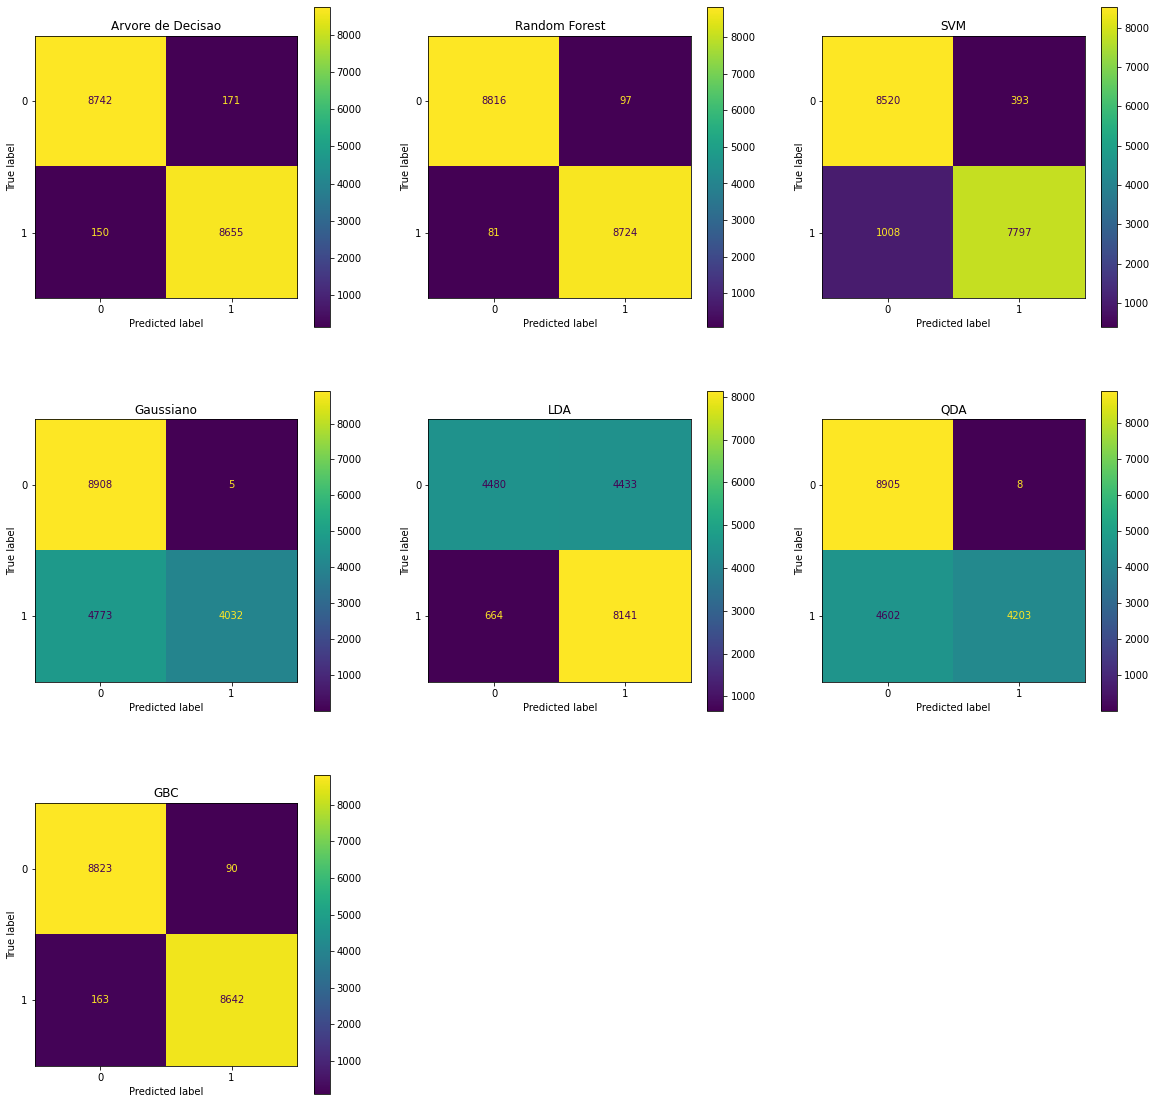

In [ ]:
# Plotando as matrizes de confusão
figure = plt.figure(figsize = (20,20))

for i, (nome_clf, cm) in enumerate(matrizes_confusao.items()):
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= labels_classificadores)
  ax = plt.subplot(3,3,i+1)
  disp.plot(ax=ax,values_format = "d")
  ax.set_title(nome_clf)

comentarios na questao 5

In [ ]:
previsoes_modelos = {'Arvore de Decisao' : y_pred_AD,
                     'Random Forest' : y_pred_RFC,
                     'SVM' : y_pred_SVM,
                     'Gaussiano' : y_pred_Gaussiano,
                     'LDA' : y_pred_LDA,
                     'QDA' : y_pred_QDA,
                     'GBC' : y_pred_GBC}

In [ ]:
# Checando métricas
for nome_clf, y_pred in previsoes_modelos.items():
  print(nome_clf)
  print(classification_report(y_test,y_pred))

Arvore de Decisao
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8913
           1       0.98      0.98      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

SVM
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      8913
           1       0.95      0.89      0.92      8805

    accuracy                           0.92     17718
   macro avg       0.92      0.92      0.92     17718
weighted avg       0.92      0.92     

**OBS**: Cada tipo de grafico/analise pode se enquadrar melhor para a resolucao de um problema, opte sempre pela maior assertividade e coerencia referente ao grupo/dado avaliado cada grafico utilizara sua logica em individualmente e essas formulas apos processadas retornarao valores estatisticos referente ao conjunto especificado

In [ ]:
y_score_RFC = clf_RFC.predict_proba(x_test_scaled)[:,1]



roc_auc_RFC = roc_auc_score(y_test, y_score_RFC)

roc_auc_RFC

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.528516635502616

In [ ]:
y_score_Arvore_Decisao = clf_Arvore_Decisao.predict_proba(x_test_scaled)[:,1]
roc_auc_Arvore_Decisao = roc_auc_score(y_test, y_score_Arvore_Decisao)
roc_auc_Arvore_Decisao

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5

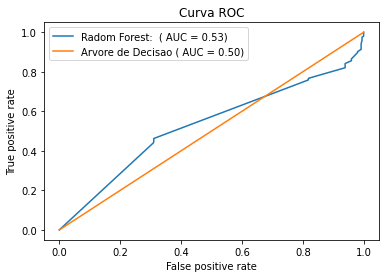

In [ ]:
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, y_score_RFC, pos_label= 1)
fpr_Arvore_Decisao , tpr_Arvore_Decisao , thresholds_Arvore_Decisao  = roc_curve(y_test, y_score_Arvore_Decisao, pos_label=0)

plt.figure()
plt.plot(fpr_RFC, tpr_RFC, label='%s ( AUC = %0.2f)' % ('Radom Forest: ', roc_auc_RFC))
plt.plot(fpr_Arvore_Decisao, tpr_Arvore_Decisao, label='%s ( AUC = %0.2f)' % ('Arvore de Decisao', roc_auc_Arvore_Decisao))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

A curva ROC é obtido pela representação da razão RPV = Positivos Verdadeiros / Positivos Totais versus a razão RPF = Positivos Falsos / Negativos Totais, para vários valores do limiar de classificação. O RPV é também conhecido como sensibilidade (ou taxa de verdadeiros positivos), e RPF = 1-especificidade ou taxa de falsos positivos. quanto maior a proximidade de 1 maior sera sua perfeicao.

5. Conclusão

a) Qual o melhor modelo, entre os modelos treinado, para esse conjunto de dados?

Ele se baseia em uma coleção de árvores de decisão em que os são vetores aleatórios independentes e identicamente distribuídos.
O Floresta Aleatória é também considerado um algoritmo muito fácil e acessível, pois seus hiperparâmetros com valores default geralmente produzem um bom resultado de predição

O melhor modelo para esse tipo especifico de dados visando uma maior assertividade e previsao estatistica seria "RandomForest" pelo fato de seus valores distribuidos em pares(exibidos por cores) serem mais proximos que os demais


b) Caso necessitarmos o modelo com a melhor revocação considerando a classe '0' como a classe positiva. Qual seria o melhor modelo?

"A Recall(revocação) nos dá informações sobre falsos negativos, esta métrica por si só, não é diretamente vinculada a classificar todos os casos corretamente. Ela indica o quanto nosso modelo está indentificando os casos positivos corretamente."

**QDA**: O discriminante pode ser positivo, igual a zero, ou negativo, e isso determina quantas soluções há para a equação do segundo grau dada:

- Um discriminante positivo indica que a equação do segundo grau tem duas soluções de números reais diferentes.
- Um discriminante igual a zero indica que a equação do segundo grau tem uma solução de número real repetido.
- Um discriminante negativo indica que nenhuma das soluções é composta por números reais.

Quadratic Discriminant Analysis (QDA) Function:

δ
j
(
x
)
=
−
(
1
/
2
)
l
o
g
|
Σ
j
|
−
(
1
/
2
)
(
x
−
μ
j
)
T
Σ
−
1
(
x
−
μ
j
)
+
l
o
g
π
j

Com Base na Receiver Operating Characteristic Curve (ROC), um grafico perfeito segundo ROC seria com uma curva exploratoria de verdadeiros positivos proximos a 1.0 que foi alcancada com o QDA